# Sampling

In Audio Signal Processing, sampling is the process of converting a continuous signal into a discrete signal.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['axes.grid'] = True

## Continuous Time (CT) Signals

In the analog domain, a sinusoidal signal is a continuous waveform that can be described by the equation:
$$
x(t) = A \cos(\omega_0 t + \phi)
$$

Where:
- $x(t)$ represents the signal amplitude at a specific time $t$.
- $A$ is the **amplitude** of the signal, which determines its peak heigth.
- $\omega_0$ is the **angular frequency** in radians per second, it determines how fast the signal oscillates.
- $\phi$ is the **phase-shift** of the signal: its position relative to time $t=0$.
- $t$ is the **continuous time** variable.

The angular frequency can be expressed as:
$$
\omega_0 = 2 \pi f
$$

where $f$ is the frequency in Hertz (cycles per second).

In [5]:
# Define a signal with amplitude, frequency, phase, and sample rate
A= .7       # Amplitude
f0= 1       # Frequency
phi= 0      # Phase
fs= 16      # Sampling rate

# Define a time vector
t = np.arange(-1.1, 1.1, 1.0 / fs)

# Generate the signal
x = A * np.cos(2 * np.pi * f0 * t + phi)

In digital signal processing, continuous-time signals (such as sound waves in the air) must be converted into discrete-time signals that can be processed by a computer. This process is called sampling, where we measure the amplitude of a signal at discrete time intervals.

The plot below illustrates this concept using a 1 Hz cosine signal:

- The top plot represents the continuous-time signal, which exists in the analog domain as $x(t)$.
- The bottom plot shows its sampled version, where the signal is represented only at discrete points in time, denoted as $x[n]$.

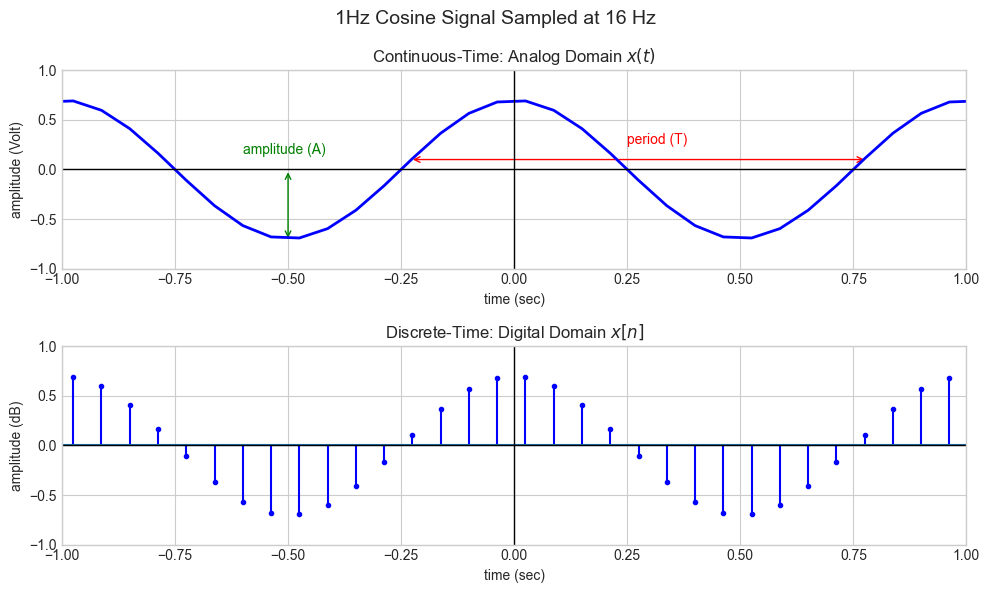

In [6]:
fig = plt.figure(figsize=(10, 6))
plt.suptitle(f'1Hz Cosine Signal Sampled at {fs} Hz', size='14')

ax1 = fig.add_subplot(211, xlabel='time (sec)', ylabel='amplitude (Volt)', xlim=(-1, 1), ylim=(-1.0, 1.0))
ax1.plot(t, x, 'b', lw=2)
ax1.set_title('Continuous-Time: Analog Domain $x(t)$', size='12' )
ax1.grid(True)
ax1.axvline(x=0, color='k', linestyle='solid', linewidth=1)
ax1.axhline(y=0, color='k', linestyle='solid', linewidth=1)
ax1.text(-0.6, 0.2, 'amplitude (A)', fontsize=10, verticalalignment='center', color='g')
arrow_style = patches.FancyArrowPatch((-0.5, 0.), (-0.5, -0.72), color='g', mutation_scale=10, arrowstyle='<->')
plt.gca().add_patch(arrow_style)
ax1.text(0.25, 0.3, 'period (T)', fontsize=10, verticalalignment='center', color='r')
arrow_style = patches.FancyArrowPatch((-0.23, 0.1), (0.78, 0.1), color='r', mutation_scale=10, arrowstyle='<->')
plt.gca().add_patch(arrow_style)

ax2 = fig.add_subplot(212, sharex=ax1, xlabel='time (sec)', ylabel='amplitude (dB)', xlim=(-1, 1), ylim=(-1.0, 1.0))
ax2.stem(t, x, linefmt='b-', markerfmt='.', basefmt='')
ax2.grid(True)
ax2.axvline(x=0, color='k', linestyle='solid', linewidth=1)
ax2.axhline(y=0, color='k', linestyle='solid', linewidth=1)
plt.title('Discrete-Time: Digital Domain $x[n]$', size='12')
plt.tight_layout()
plt.show()

## Discrete Time Signals

In the digital domain, we work with discrete-time signals, which means we have samples of the signal taken at regular intervals. The same sinusoidal signal can be represented digitally as:
$$
x[n] = A \cos\left(\frac{2\pi}{N} n + \phi\right)
$$

Where:
- $x[n]$ represents the signal amplitude at a specific sample index $n$.
- $A$ is the amplitude of the signal, which determines its peak heigth.
- $\frac{2\pi}{N}$ is the angular frequency, where $N$ is the number of samples per period. It determines how many samples we take for one cycle of the waveform.
- $\phi$ is the phase-shift.
- $n$ is the discrete time index.

In the digital domain, the frequency ($f_d$) is related to the digital angular frequency $$f_d = \frac{f_s}{N}$$

Where:
- $f_d$ is the digital frequency in Hertz (cycles per second).
- $f_s$ is the sampling frequency in Hertz (samples per second).
- $N$ is the number of samples per period.

This means that in digital signal processing, we represent continuous analog signals by discretizing them into individual samples. The digital angular frequency is directly related to the analog frequency and the number of samples per period. This discretization enables us to process and analyze signals using computational techniques.

The figure below visually demonstrates this concept. The blue curve represents the original continuous 1 Hz cosine wave, while the red markers show the sampled points at a sampling rate of 16 Hz. This superposition helps illustrate how a continuous waveform is represented in discrete time.

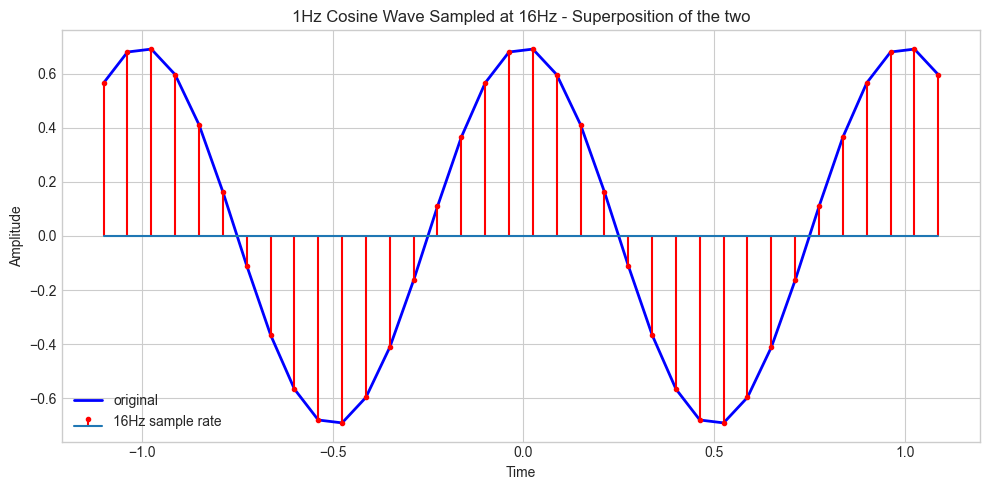

In [21]:
fig = plt.figure(figsize=(10, 5))
plt.plot(t, x, 'b', lw=2, label='original')
plt.stem(t, x, linefmt='r-', markerfmt='.', basefmt='', label=f'{fs}Hz sample rate')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title(f'1Hz Cosine Wave Sampled at {fs}Hz - Superposition of the two')
plt.legend()
plt.tight_layout()
plt.show()

## Aliasing

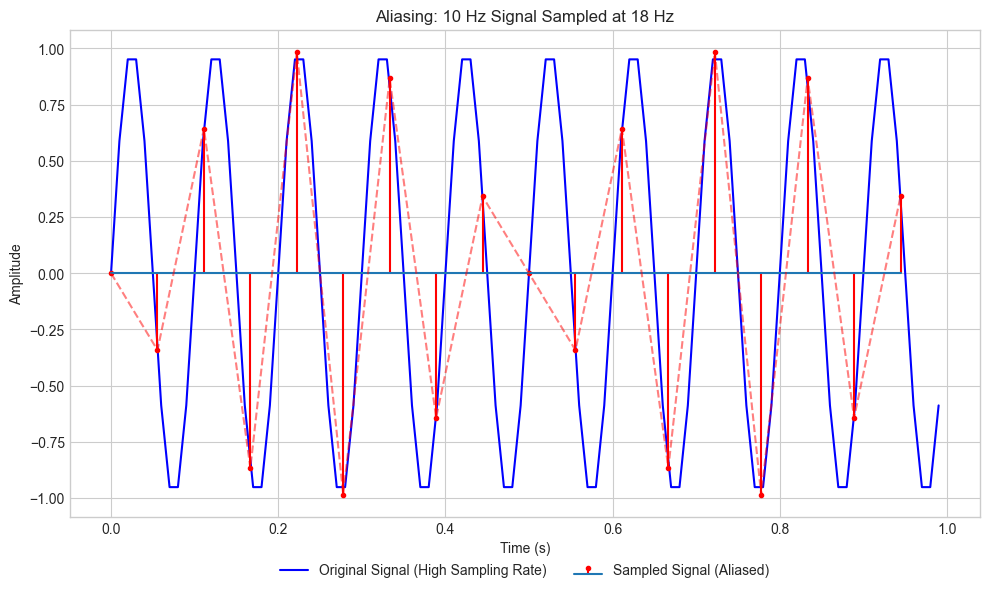

In [26]:
# Define signal parameters
f_signal = 10  # Frequency of the original signal (Hz)
T = 1  # Duration (seconds)
fs_high = 100  # High sampling rate for the continuous-like signal
fs_low = 18    # Insufficient sampling rate (below Nyquist)

# Time vectors for high and low sampling rates
t_high = np.arange(0, T, 1 / fs_high)  # High-resolution time
t_low = np.arange(0, T, 1 / fs_low)    # Low-resolution time

# Generate the original continuous signal
x_high = np.sin(2 * np.pi * f_signal * t_high)

# Sample the signal at the lower sampling rate
x_low = np.sin(2 * np.pi * f_signal * t_low)

# Plot results
plt.figure(figsize=(10, 6))

# Plot high-resolution signal
plt.plot(t_high, x_high, 'b-', label='Original Signal (High Sampling Rate)')

# Plot low-sampled version
plt.stem(t_low, x_low, linefmt='r-', markerfmt='.', basefmt='', label='Sampled Signal (Aliased)')
plt.plot(t_low, x_low, 'r--', alpha=0.5)

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title(f"Aliasing: {f_signal} Hz Signal Sampled at {fs_low} Hz")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.tight_layout()
plt.show()

## Nyquist-Shannon Sampling Theorem


## Oversampling

